In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import glob #grab some files 
from tqdm import tqdm # to look at progress bars
import scipy # Used for image processing 
import scipy.misc
import pandas as pd
import h5py as hp
import numpy as np

In [ ]:
camfiles=sorted(glob.glob('/content/drive/My Drive/Project_data/cam/*.h5'))
camfiles

['/content/drive/My Drive/Project_data/cam/2016-01-30--11-24-51.h5',
 '/content/drive/My Drive/Project_data/cam/2016-01-30--13-46-00.h5',
 '/content/drive/My Drive/Project_data/cam/2016-01-31--19-19-25.h5',
 '/content/drive/My Drive/Project_data/cam/2016-02-02--10-16-58.h5',
 '/content/drive/My Drive/Project_data/cam/2016-02-08--14-56-28.h5',
 '/content/drive/My Drive/Project_data/cam/2016-02-11--21-32-47.h5',
 '/content/drive/My Drive/Project_data/cam/2016-03-29--10-50-20.h5',
 '/content/drive/My Drive/Project_data/cam/2016-04-21--14-48-08.h5',
 '/content/drive/My Drive/Project_data/cam/2016-05-12--22-20-00.h5',
 '/content/drive/My Drive/Project_data/cam/2016-06-02--21-39-29.h5',
 '/content/drive/My Drive/Project_data/cam/2016-06-08--11-46-01.h5']

In [ ]:
logfiles=sorted(glob.glob('/content/drive/My Drive/Project_data/log/*.h5'))
logfiles

['/content/drive/My Drive/Project_data/log/2016-01-30--11-24-51.h5',
 '/content/drive/My Drive/Project_data/log/2016-01-30--13-46-00.h5',
 '/content/drive/My Drive/Project_data/log/2016-01-31--19-19-25.h5',
 '/content/drive/My Drive/Project_data/log/2016-02-02--10-16-58.h5',
 '/content/drive/My Drive/Project_data/log/2016-02-08--14-56-28.h5',
 '/content/drive/My Drive/Project_data/log/2016-02-11--21-32-47.h5',
 '/content/drive/My Drive/Project_data/log/2016-03-29--10-50-20.h5',
 '/content/drive/My Drive/Project_data/log/2016-04-21--14-48-08.h5',
 '/content/drive/My Drive/Project_data/log/2016-05-12--22-20-00.h5',
 '/content/drive/My Drive/Project_data/log/2016-06-02--21-39-29.h5',
 '/content/drive/My Drive/Project_data/log/2016-06-08--11-46-01.h5']

In [ ]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [ ]:
from keras.models import Sequential,Model 
from keras.layers.core import Dense,Dropout,Activation,Flatten,Reshape
from keras.layers import Embedding,Input ,merge, ELU
from keras.layers.recurrent import SimpleRNN , LSTM 
from keras.layers.convolutional import Convolution2D , MaxPooling2D
from keras.optimizers import SGD ,Adam,RMSprop
from keras.regularizers import l2,l1
from keras.utils.np_utils import to_categorical 
from keras import backend as K
from sklearn.metrics import accuracy_score

In [ ]:
#dfile='/content/drive/My Drive/Project_data/cam/2016-02-08--14-56-28.h5'
dfile=camfiles[5]
h5f=hp.File(dfile,'r')
img=h5f.get('X')

In [ ]:
img_train=np.array(img[:,:,:,100:-80])
img_train.shape

(85296, 3, 160, 140)

In [ ]:
del img

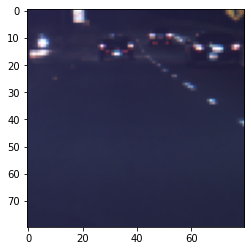

In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
nframes=img_train.shape[0]

smcam=np.zeros((nframes,3,80,80),dtype=np.uint8) # strip down images to 64 x 64 
temp_img=np.zeros((3,80,80),dtype=np.uint8)
#c=x_train[:,:,:,80:-80]
#temp=c[3000]
#print(c.shape)
#plt.imshow(temp.transpose(1,2,0))
for i in range(nframes):
    #print(i)
    temp=img_train[i]
    temp= cv2.resize(temp.transpose(1,2,0), (80,80), interpolation = cv2.INTER_AREA)
    smcam[i]=temp.transpose(2,1,0)                          #cv2.resize(temp,(64,64), interpolation = cv2.INTER_AREA)
    #smcam[i].transpose()
    #resize(image, (100, 100))
lgth=math.floor(0.9*nframes)
img_test=smcam[lgth+1:-1,:,:,:]
img_train=smcam[0:lgth,:,:,:]

plt.imshow(smcam[3000].transpose(2,1,0))


In [ ]:
h5f.close()
print(img_test.shape)
print(img_train.shape)

(8528, 3, 80, 80)
(76766, 3, 80, 80)


In [ ]:
#def normalize(x):
 #   return (x.astype(float) - 128) / 128
#img_norm_train=np.zeros((nframes*3*160*320,1),dtype=np.uint8)
#x_norm_train=np.zeros((3*160*320,1),dtype=np.uint8)
#x_train.flatten()
#img_norm_train=normalize(x_train)
#img_norm_train=Reshape(x_train,(nframes,3,160,320))
#img_norm=normalize(img)

In [ ]:
log=logfiles[5]
h5f=hp.File(log,'r')

In [ ]:
A=dict(h5f.items())

In [ ]:
A['cam1_ptr'][()] # Camera pointer log file 
np.max(A['cam1_ptr'][()])

85295.0

In [ ]:
%matplotlib inline 

plt.ion()

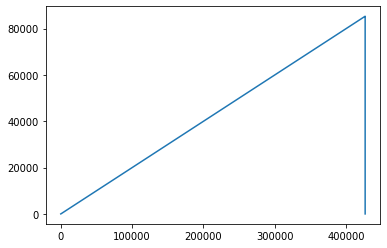

In [ ]:
plt.plot(A['cam1_ptr'][()])

In [ ]:
B= A['cam1_ptr'][()]
#list(B)

In [ ]:
B.max()

85295.0

In [ ]:
tm=A['times'][()] # Actual time in seconds , this clip consists of 1000/60 ~ 15 mins of driving 

In [ ]:
len(tm)

426596

In [ ]:
spds=h5f['speed'][()]
accel=h5f['car_accel'][()]
steer=h5f['steering_angle'][()]
ptrs=h5f['cam1_ptr'][()]

In [ ]:
spds.shape

(426596,)

In [ ]:
ptrs

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
steer

array([-154., -154., -154., ...,  100.,  100.,  100.])

In [ ]:
starts=np.zeros(nframes+2,dtype=np.uint32)

In [ ]:
 # ?? 
cur=1
for i,p in enumerate(ptrs):
    if int(p)==cur:
      starts[cur]= i # i is the index of whatever value you're on 
      cur+=1
print(starts.shape)

(85298,)


In [ ]:
count=0

i=100
for i in range(100,85297):
   if (starts[i]==0):
       break ;
   
print(i)     
#starts[0]=0
print(starts[85295])
starts=starts[0:-2]
print(starts.shape)

85296
426587
(85296,)


In [ ]:
spds=h5f['speed'][starts]
accel=h5f['car_accel'][starts]
steer=h5f['steering_angle'][starts]
gas=h5f['gas'][starts]
brake=h5f['brake'][starts]
ptrs=h5f['cam1_ptr'][starts]


In [ ]:
print(plt.rcParams.get('figure.figsize'))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5 # Dimensions of output window
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

[6.0, 4.0]


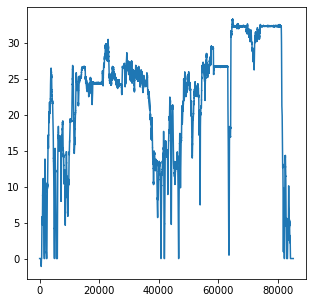

In [ ]:
plt.plot(spds)

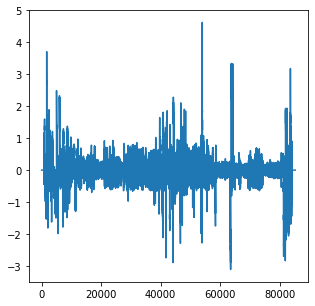

In [ ]:
plt.plot(accel) # huge spike shows accelaration changes are dramatic
                # dense area shows that vehicle is experiencing less speed changes 

In [ ]:
# Performing the same scale up operation on all 4 necessary features
print("accel ",accel[100:120]) 
accel_norm=(accel-np.min(accel))/(np.max(accel)-np.min(accel))
print(" \n accel_norm  ", accel_norm[100:120])
steer_norm=(steer-np.min(steer))/(np.max(steer)-np.min(steer))
print("\n gas :",gas[20:40])
gas_norm=(gas-np.min(gas))/(np.max(gas)-np.min(gas))
print("\n gas_norm ",gas_norm[20:40])
brake_norm=(brake-np.min(brake))/(np.max(brake)-np.min(brake))
print("\n brake :",brake[100:120])
print("\n brake_norm :",brake_norm[100:120])
print(spds[100:120])
spds_norm=(spds-np.min(spds))/(np.max(spds)-np.min(spds))
print("\n Speed_norm :",spds_norm[100:120])

accel  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 
 accel_norm   [0.40206732 0.40206732 0.40206732 0.40206732 0.40206732 0.40206732
 0.40206732 0.40206732 0.40206732 0.40206732 0.40206732 0.40206732
 0.40206732 0.40206732 0.40206732 0.40206732 0.40206732 0.40206732
 0.40206732 0.40206732]

 gas : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

 gas_norm  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

 brake : [33679.84380528 35142.7171953  36605.59058532 38068.46397534
 39531.33736536 40994.21075537 42457.08414539 43919.95753541
 45382.83092543 46845.70431545 48308.57770546 49771.45109548
 51234.3244855  52697.19787552 54160.07126554 55622.94465555
 57085.81804557 58548.69143559 60011.56482561 61474.43821563]

 brake_norm : [0.52777533 0.55065561 0.57353589 0.59641617 0.61929644 0.64217672
 0.665057   0.68793727 0.71081755 0.73369783 0.7565781  0.77945838
 0.80233866 0.82521894 0.84809921 0.87097949 0.89385977 0.91674004
 0.93962032 0.

In [ ]:
del accel
del brake
del steer
del gas
del spds


In [ ]:
data_1=np.load('/content/drive/My Drive/Project_data/data_set_3.npz')
X_train_imgs=data_1['img_train']

X_test_imgs=data_1['img_test']
spds_t=data_1['spds']
accel_t=data_1['accel']
speedx=np.column_stack((data_1['spds'],data_1['accel']))
#speedx=speedx.reshape((-1,2))
steer_t=data_1['steer']
gas_t=data_1['gas']
brake_t=data_1['brake']
print(brake_t.shape)
print("brake= ",brake_t)
#y1=np.concatenate(speedx,steer_t)
#y_t=y_t.reshape((2,-1))
y1=np.column_stack((data_1['steer'],data_1['gas']))   #,data_1['brake'])
#y1=y1.reshape(-1,2)
y2=np.column_stack((speedx,y1))
#y2=y2.reshape(-1,4)
y_t=np.column_stack((y2,brake_t))
#y_t=y_t.reshape((-1,5))
#print(steer_t)
#print(speedx[10:20])
#print(" \n X_t",X_t)
print("y_t shape: ",y_t.shape)
y_t=np.array(y_t)
y_train_t=y_t[0:X_train_imgs.shape[0]]
y_test_t=y_t[X_train_imgs.shape[0]+1:-1]
print("\n y_t",y_t[2300:2307]) # Checking 7 examples
print("\n X_train_imgs shape :",X_train_imgs.shape)
print("\n y_train_imgs shape :",y_train_t.shape)
#np.reshape(X_t,X_t.shape[0],X_t.shape[2],X_t.shape[3],X_t.shape[1])
#print("\n X_t shape is now changed as per tf style :",X_t.shape)

#print("\n ",brake_t)  /content/data_set.npz

(85296,)
brake=  [0.001001   0.001001   0.001001   ... 0.00125125 0.00125125 0.00125125]
y_t shape:  (85296, 5)

 y_t [[0.03199254 0.40206732 0.60337256 0.         0.00675676]
 [0.03199254 0.40206732 0.60338946 0.         0.00675676]
 [0.03199254 0.40206732 0.60338946 0.         0.00675676]
 [0.03199254 0.40206732 0.60338946 0.         0.00675676]
 [0.03199254 0.40206732 0.60338946 0.         0.00675676]
 [0.03199254 0.40206732 0.60338946 0.         0.00675676]
 [0.03199254 0.40206732 0.60338946 0.         0.00675676]]

 X_train_imgs shape : (76766, 3, 80, 80)

 y_train_imgs shape : (76766, 5)


In [ ]:
np.savez('data_set_5.npz',
         X_train_imgs=X_train_imgs,
         X_test_imgs=X_test_imgs,
         y_train_imgs=y_train_t,
         y_test_imgs=y_test_t
         )

In [ ]:
!cp "/content/data_set_5.npz"  "/content/drive/My Drive/Project_data/data_set_5.npz"

In [ ]:

#model.fit(X_t,(speedx,gas_t,brake_t,steer_t),batch_size=32,epochs=100,verbose=1,validation_split=0.1,shuffle=True)
#model.fit(X_t,steer_t,batch_size=100,epochs=10,verbose=1,validation_split=0.1,shuffle=True)
import keras.backend.tensorflow_backend as tfback
def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

In [ ]:
from keras.layers.convolutional import MaxPooling2D 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import TensorBoard, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from keras.layers import GlobalMaxPooling2D
import tensorflow.keras
import math

#def baseline_mod
spds_train=spds_t[0:50000]
spds_test=spds_t[50001:-1]
steer_train=steer_t[0:X_train_imgs.shape[0]]

steer_test=steer_t[X_train_imgs.shape[0]+1:-1]

accel_train=accel_t[0:50000]
accel_test=accel_t[50001:-1]
gas_train=gas_t[0:50000]
gas_test=gas_t[50001:-1]
brake_train=brake_t[0:50000]
brake_test=brake_t[50001:-1]
#inputs = keras.Input(shape=(3,80,80))
model=Sequential()
          #model.add(Dense(10,activation='relu')) #input layer
model.add(Convolution2D(128,(3,3),input_shape=(3,80,80),activation='relu',data_format='channels_first')) #1st conv layer
model.add(MaxPooling2D())       #pool_size=(2,2),data_format='channels_last'
#x=modl(inputs)                  #add model layers
                  #model.add(Conv2D(64, kernel_size=3, activation=’relu’, input_shape=(28,28,1)))
model.add(Convolution2D(128,(3,3),activation='relu',data_format='channels_first'))
model.add(MaxPooling2D())
#x=modl(inputs)           #pool_size=(2,2),data_format='channels_first
model.add(Convolution2D(128,(3,3),activation='relu',data_format='channels_first'))
model.add(MaxPooling2D())
#x=modl(inputs)     #pool_size=(2,2),data_format='channels_first'
model.add(Convolution2D(64,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
model.add(Convolution2D(64,(3,3),activation='relu',data_format='channels_first'))
model.add(MaxPooling2D()) 
#x=modl(inputs)        #
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#x=modl(inputs)
model.add(Dense(64, activation='relu'))
#x=modl(inputs)
model.add(Dense(1,activation='linear'))
#model= Model(inputs=inputs,outputs=outputs)
print(model.summary())
model.compile(loss='mse',optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])



history = model.fit(X_train_imgs, steer_train, batch_size=100, epochs=10, validation_split=0.2)

 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 78, 78)       3584      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 39, 78)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 37, 76)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 18, 76)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 16, 74)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 8, 74)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 6, 64)        

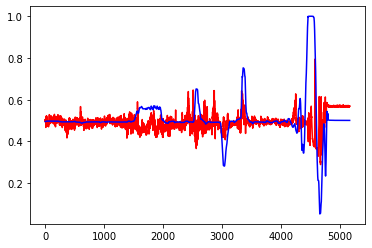

In [ ]:
import matplotlib.pyplot as plt

pred=model.predict(X_test_imgs)
plt.plot(pred,color='red')
plt.plot(steer_test,color='blue')

In [ ]:
model.save('Steer_7GB.model')
!cp "/content/Steer_7GB.model"  "/content/drive/My Drive/Cam/Steer_7GB.model"

In [ ]:
"""
from keras.layers.convolutional import MaxPooling2D 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import TensorBoard, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from keras.layers import GlobalMaxPooling2D
import math


def build_model(layers):
    model = Sequential()
    
    model.add(Convolution2D(128, (3,3),activation='relu',input_shape=(3,80,80),data_format='channels_first'))  # 64 -- 128

    model.add(MaxPooling2D())
    # model.add(Dropout(0.5))

    model.add(Convolution2D(128, (3,3), activation='relu'))                   # 64 -- 128
    #model.add(GlobalMaxPooling2D())
    
    model.add(Convolution2D(128, (3,3), activation='relu'))                   # 64 -- 128
    model.add(GlobalMaxPooling2D())
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))                                      # 64 -- 128
    model.add(Dense(64, activation='relu'))
    #print(model.summary())
    # model.add(Dropout(0.2))
    #model.add(Flatten())
    model.add(Dense(1),activation='linear')
    #model.add(Activation('linear'))
    
    model.compile(loss='mse', optimizer='adam',metrics=[tf.keras.metrics.MeanSquaredError()])
    
    print(model.summary())
    #plot_model(model, to_file='./model/model_'+filename+'.png', show_shapes=True)
          
    return model


#X_train=X_t[0:22000]
#X_test=X_t[-1000:-1]
print(X_train_imgs.shape[1])
spds_train=spds_t[0:50000]
spds_test=spds_t[50001:-1]
steer_train=steer_t[0:50000]

steer_test=steer_t[50001:-1]

accel_train=accel_t[0:50000]
accel_test=accel_t[50001:-1]
gas_train=gas_t[0:50000]
gas_test=gas_t[50001:-1]
brake_train=brake_t[0:50000]
brake_test=brake_t[50001:-1]
#y_train=[spds_train,accel_train,steer_train,gas_train,brake_train]
#y_train=np.array(y_train)
#y_test=[spds_test,accel_test,steer_test,gas_test,brake_test]
#y_test=np.array(y_test)

#print(y_train[1:3,:],".............\n ",y_test[1:3,:])
batch_size=500
#l=math.floor(X_train_imgs.shape[0]/batch_size)

def run_network(X_train, y_train, X_test, y_test,layers,epochs):
    model = build_model(layers)
    history = None
    
    try:
        history = model.fit(
            X_train,y_train,
            batch_size=batch_size, 
            epochs=epochs,
            validation_split=0.1,
            callbacks=[
                TensorBoard(log_dir='./logs', write_graph=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=60, 
                                verbose=1, mode='auto', min_lr=0.0001),
                EarlyStopping(monitor='val_loss', patience=80, verbose=1, mode='auto'),
                ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=1, 
                                save_best_only=True, mode='auto')
            ])
    except KeyboardInterrupt:
        print("\nTraining interrupted")
    
    predicted = model.predict(X_test)
    scores = model.evaluate(predicted,y_test, verbose=0)
    
    return model, predicted, history, scores



model, predicted, history, scores = run_network(X_train_imgs,steer_train,X_test_imgs,steer_test,layers=[X_train_imgs.shape[0],steer_train.shape[1]],epochs=5)


print(scores)
print(history.history.keys())
"""

3


IndexError: ignored